In [1]:
# Code by Son Nguyen

In [2]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

In [3]:
drought = pd.read_csv('temperature and precipitation/final_drought_temp_data.csv')

In [4]:
drought['climate_regions']=drought['Name']

#### David's Code

In [5]:
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values

In [6]:
oh_list=['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia']

In [7]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary


In [8]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)


In [9]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)

In [10]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [11]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
#combine multiple dictionaries into one
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

In [12]:
drought['climate_regions']=drought['Name']

In [13]:
#Replaced initial values with dictionary region values
drought.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [14]:
drought['ValidEnd'] = pd.to_datetime(drought['ValidEnd'])

In [15]:
drought = drought[drought['ValidEnd']<'2021-01-01']

In [16]:
ohio_valley = drought[drought['climate_regions'] == 'Ohio Valley']

In [17]:
west = drought[drought['climate_regions'] == 'West']

In [18]:
up_mid = drought[drought['climate_regions'] == 'Upper Midwest']

In [19]:
nrp = drought[drought['climate_regions'] == 'Northern Rockies and Plains']

In [20]:
ne = drought[drought['climate_regions'] == 'Northeast']

In [21]:
nw = drought[drought['climate_regions'] == 'Northwest']

In [22]:
south = drought[drought['climate_regions'] == 'South']

In [23]:
sw = drought[drought['climate_regions'] == 'Southwest']

In [24]:
se = sw = drought[drought['climate_regions'] == 'Southeast']

In [25]:
ohio_valley

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm,climate_regions
10451,2020-12-28,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,38.465714,17.117143,0.108000,2.743200,Ohio Valley
10452,2020-12-21,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,39.528571,26.411429,0.006000,0.152400,Ohio Valley
10453,2020-12-14,Illinois,IL,32814.14,16191.10,6236.48,1140.83,0.0,0.0,8839298.46,...,0.0,0.0,57,56382.55,12847389.79,44.220000,29.057143,1.026000,26.060400,Ohio Valley
10454,2020-12-07,Illinois,IL,32794.13,18023.24,4619.65,945.53,0.0,0.0,8650968.46,...,0.0,0.0,53,56382.55,12847389.80,43.485714,24.954286,0.000000,0.000000,Ohio Valley
10455,2020-11-30,Illinois,IL,28067.62,21244.44,6124.95,945.53,0.0,0.0,8375517.01,...,0.0,0.0,64,56382.54,12847389.80,46.328571,32.782857,1.082000,27.482800,Ohio Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,2001-01-29,West Virginia,WV,3547.74,19253.58,1403.34,0.00,0.0,0.0,261876.40,...,0.0,0.0,91,24204.66,1852994.01,40.380952,19.880952,0.223333,5.672667,Ohio Valley
45976,2001-01-22,West Virginia,WV,5496.60,14287.99,3143.43,1276.64,0.0,0.0,443651.89,...,0.0,0.0,101,24204.66,1852994.00,35.142857,23.095238,1.165000,29.591000,Ohio Valley
45977,2001-01-15,West Virginia,WV,7763.39,12021.20,3143.44,1276.64,0.0,0.0,664684.83,...,0.0,0.0,91,24204.67,1852994.00,43.904762,24.714286,0.008333,0.211667,Ohio Valley
45978,2001-01-08,West Virginia,WV,7763.16,12391.29,3670.41,379.81,0.0,0.0,664647.42,...,0.0,0.0,86,24204.67,1852993.99,33.119048,21.452381,0.055000,1.397000,Ohio Valley


#### Julio's Code

In [26]:
#julio's code
west=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum', 'avg_tmax': 'mean', 'avg_tmin': 'mean', 'total_avg_prcp_inches':'sum', 'total_avg_prcp_mm': 'sum'})

In [27]:
west

,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
ValidEnd,,,,,,,,,,,,,,,,,,,
2001-01-01,268682.71,0.00,0.00,0.00,0.00,0.00,39954507.39,0.00,0.00,0.00,0.00,0.00,0.0,39954507.39,268682.71,55.340909,25.125000,0.000000,0.000000
2001-01-08,219867.53,48815.18,0.00,0.00,0.00,0.00,19148835.12,20805672.27,0.00,0.00,0.00,0.00,15.5,39954507.39,268682.71,56.907792,26.157468,0.573636,14.570364
2001-01-15,183369.34,85313.37,0.00,0.00,0.00,0.00,19147061.90,20807445.49,0.00,0.00,0.00,0.00,29.5,39954507.39,268682.71,45.813312,28.798701,1.895909,48.156091
2001-01-22,229132.27,39550.44,0.00,0.00,0.00,0.00,38419211.81,1535295.58,0.00,0.00,0.00,0.00,15.0,39954507.39,268682.71,47.125649,23.713312,0.072500,1.841500
2001-01-29,193653.20,75029.51,0.00,0.00,0.00,0.00,38179628.97,1774878.42,0.00,0.00,0.00,0.00,28.5,39954507.39,268682.71,46.303571,27.376623,1.511818,38.400182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,5542.04,34654.88,60303.12,60478.93,88304.37,19399.37,5547783.11,14970129.93,5063039.47,10253169.73,2805310.34,1315074.81,304.5,39954507.39,268682.71,56.321537,27.510931,0.078106,1.983894
2020-12-07,5473.73,34723.19,60303.12,60312.51,84406.25,23463.92,5523003.27,14994909.77,5063039.47,10252697.32,2798285.43,1322572.14,306.5,39954507.40,268682.72,57.441558,25.848864,0.075455,1.916545
2020-12-14,0.00,7958.10,54374.95,93821.89,89063.85,23463.92,0.00,6801658.18,16499875.50,12485483.68,2844917.89,1322572.14,333.0,39954507.39,268682.71,52.524567,28.696212,0.907500,23.050500


#### Son's Code

In [28]:
#plotting Drought history
def plot_dsci(region, name):
    region['DSCI'].plot(figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI (Severity Level)")
    plt.title(f'{name} Region Drought Severity 2001-2020')
    plt.savefig('fig.png')

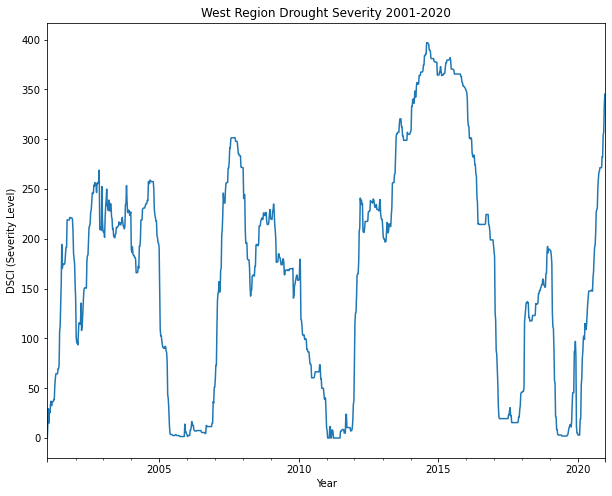

In [29]:
plot_dsci(west, 'West')

In [30]:
#creating function to create window size and DF input. window size or kernal size 
#is used by NN to make predictions on next iteration.
# Code modified from Greg Hogg https://www.youtube.com/watch?v=kGdbPnMCdOg
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [31]:
WINDOW_SIZE = 5
X, y = df_to_X_y(west['DSCI'], WINDOW_SIZE)
X.shape, y.shape

((1039, 5, 1), (1039,))

In [32]:
#Creating training, val, and test set
X_train, y_train = X[:750], y[:750]
X_val, y_val = X[750:850], y[750:850]
X_test, y_test = X[850:], y[850:]

In [33]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Model checkpoint, saving best model. 
#Loss function is measured on MSE and metrics used is RMSE
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [35]:
#Saving history to view loss
history = (model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp]))

Epoch 1/10
24/24 [==============================] - 3s 37ms/step - loss: 42517.8516 - root_mean_squared_error: 206.1986 - val_loss: 67365.8672 - val_root_mean_squared_error: 259.5493


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
24/24 [==============================] - 0s 8ms/step - loss: 37042.9492 - root_mean_squared_error: 192.4655 - val_loss: 56925.0703 - val_root_mean_squared_error: 238.5898


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 29349.9980 - root_mean_squared_error: 171.3184 - val_loss: 43962.4609 - val_root_mean_squared_error: 209.6723


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
24/24 [==============================] - 0s 7ms/step - loss: 20136.6270 - root_mean_squared_error: 141.9036 - val_loss: 30169.1152 - val_root_mean_squared_error: 173.6926


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
24/24 [==============================] - 0s 7ms/step - loss: 11981.0195 - root_mean_squared_error: 109.4578 - val_loss: 18104.5371 - val_root_mean_squared_error: 134.5531


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 6080.4380 - root_mean_squared_error: 77.9772 - val_loss: 9855.4707 - val_root_mean_squared_error: 99.2747


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 2991.6375 - root_mean_squared_error: 54.6959 - val_loss: 4933.1895 - val_root_mean_squared_error: 70.2367


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
24/24 [==============================] - 0s 6ms/step - loss: 1558.4905 - root_mean_squared_error: 39.4777 - val_loss: 2668.2920 - val_root_mean_squared_error: 51.6555


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
24/24 [==============================] - 0s 6ms/step - loss: 914.3746 - root_mean_squared_error: 30.2386 - val_loss: 1441.6642 - val_root_mean_squared_error: 37.9693


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
24/24 [==============================] - 0s 7ms/step - loss: 544.0947 - root_mean_squared_error: 23.3258 - val_loss: 760.4575 - val_root_mean_squared_error: 27.5764


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [36]:
#Creating DF for loss history
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,42517.851562,206.198578,67365.867188,259.549347
1,37042.949219,192.465454,56925.070312,238.589752
2,29349.998047,171.318405,43962.460938,209.672272
3,20136.626953,141.903580,30169.115234,173.692581
4,11981.019531,109.457840,18104.537109,134.553101
5,6080.437988,77.977165,9855.470703,99.274727
6,2991.637451,54.695862,4933.189453,70.236664
7,1558.490479,39.477722,2668.291992,51.655514
8,914.374573,30.238626,1441.664185,37.969254
9,544.094727,23.325838,760.457520,27.576395


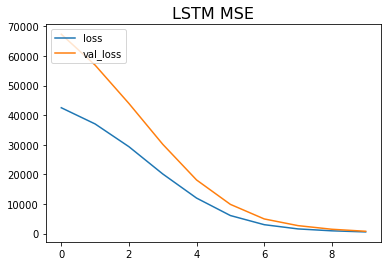

In [37]:
#plotting loss
history_df.filter(like='loss').plot()
plt.title("LSTM MSE", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig2.png')

In [38]:
from tensorflow.keras.models import load_model
model1 = load_model("model1/")

In [39]:
#Predictions
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,27.447309,25.5
1,27.227859,34.0
2,36.078739,37.0
3,39.880558,32.5
4,30.551840,36.0
...,...,...
745,315.368164,379.5
746,315.368408,380.0
747,315.374451,380.5
748,315.381042,382.0


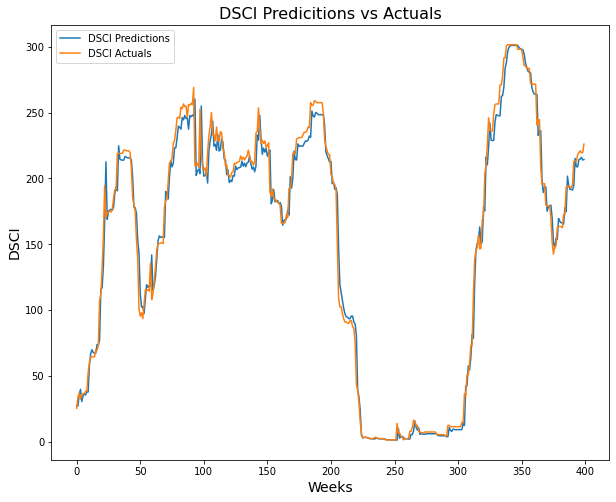

In [40]:
#plot pred vs actuals
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(train_results['Train Predictions'][:400], label = 'DSCI Predictions')
plt.plot(train_results['Actuals'][:400], label = "DSCI Actuals")
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig1.png')

In [41]:
#Validation set results
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,315.359894,370.5
1,315.236359,370.5
2,315.218903,370.5
3,315.210114,370.5
4,315.209045,370.0
...,...,...
95,17.644905,19.5
96,17.644905,19.5
97,17.644905,19.5
98,17.644905,19.5


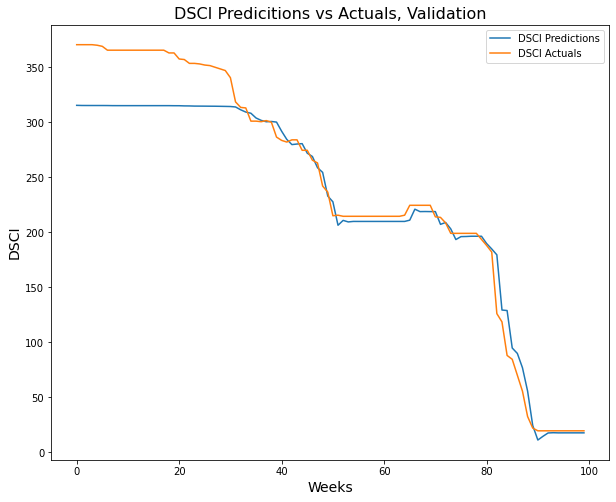

In [42]:
#plot validation set 
plt.figure(figsize = (10,8))
plt.plot(val_results['Val Predictions'], label = 'DSCI Predictions')
plt.plot(val_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Validation", fontsize=16)
plt.legend()
plt.savefig('fig3.png')

In [43]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,315.359894,370.5
1,315.236359,370.5
2,315.218903,370.5
3,315.210114,370.5
4,315.209045,370.0
...,...,...
95,17.644905,19.5
96,17.644905,19.5
97,17.644905,19.5
98,17.644905,19.5


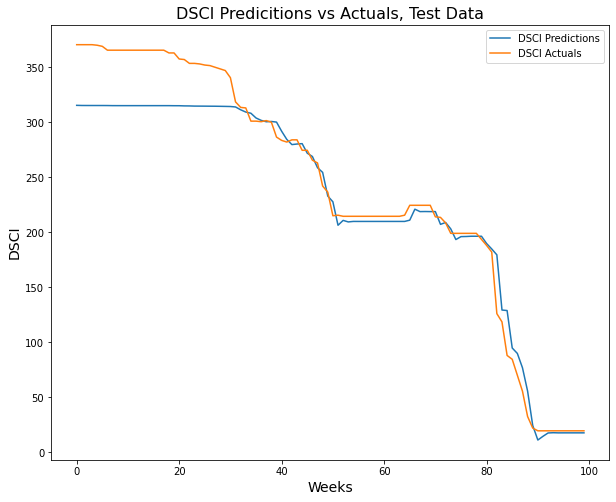

In [44]:
plt.figure(figsize = (10,8))
plt.plot(test_results['Test Predictions'], label = 'DSCI Predictions')
plt.plot(test_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Test Data", fontsize=16)
plt.legend()
plt.savefig('fig4.png')

In [45]:
#plotting predictions 
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(fignum, model, X, y, start = 0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize = (10,8))
    plt.plot(df['Predictions'][start:end], label = 'DSCI Predictions')
    plt.plot(df['Actuals'][start:end], label = 'DSCI Actuals' )
    plt.xlabel("Weeks", fontsize=14)
    plt.ylabel("DSCI", fontsize=14)
    plt.title("DSCI Predicitions vs Actuals", fontsize=16)
    plt.legend()
    plt.savefig(f'fig{str(fignum)}.png')
    return df, mse(y, predictions)

(     Predictions  Actuals
 0      17.644903     19.5
 1      17.644903     19.5
 2      17.644903     19.5
 3      17.644903     19.5
 4      17.644903     19.5
 ..           ...      ...
 184   276.533661    304.5
 185   295.167267    306.5
 186   301.507874    333.0
 187   310.775299    345.5
 188   313.479736    345.5
 
 [189 rows x 2 columns],
 170.09683517783958)

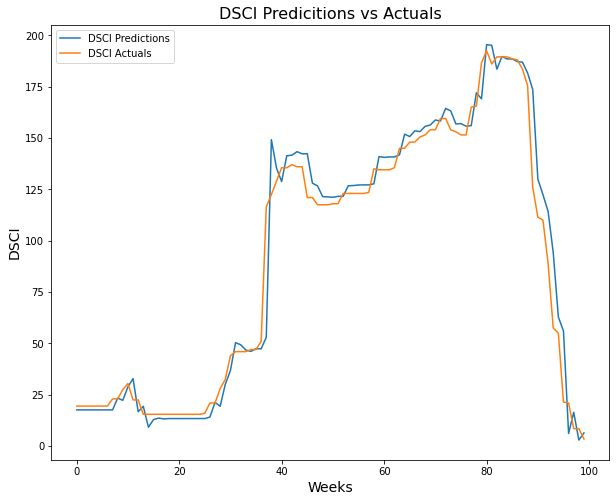

In [46]:
plot_predictions1(5, model1, X_test, y_test)

In [106]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 64)             192       
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 2056      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 64)             192       
______________________________

In [107]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [108]:
history = (model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2]))

Epoch 1/10
24/24 [==============================] - 1s 9ms/step - loss: 20897.9258 - root_mean_squared_error: 144.5611 - val_loss: 9290.9180 - val_root_mean_squared_error: 96.3894
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 1078.0240 - root_mean_squared_error: 32.8333 - val_loss: 685.8765 - val_root_mean_squared_error: 26.1892
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 290.5757 - root_mean_squared_error: 17.0463 - val_loss: 418.6009 - val_root_mean_squared_error: 20.4597
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 238.1458 - root_mean_squared_error: 15.4320 - val_loss: 261.4579 - val_root_mean_squared_error: 16.1697
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 179.7215 - root_mean_squared_error: 13.4060 - val_loss: 140.9467 - val_root_mean_squared_error: 11.8721
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 148.1757 - root_mean_squared_error: 12.1727 - val_loss: 116.3317 - val_root_mean_squared_error: 10.7857
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 211.9986 - root_mean_squared_error: 14.5602 - val_loss: 389.0677 - val_root_mean_squared_error: 19.7248
Epoch 8/10
24/24 [==============================] - 0s 6ms/step - loss: 145.2684 - root_mean_squared_error: 12.0527 - val_loss: 190.5031 - val_root_mean_squared_error: 13.8023
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 127.6335 - root_mean_squared_error: 11.2975 - val_loss: 74.2643 - val_root_mean_squared_error: 8.6177
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 10/10
24/24 [==============================] - 0s 6ms/step - loss: 138.0618 - root_mean_squared_error: 11.7500 - val_loss: 123.1415 - val_root_mean_squared_error: 11.0969


In [109]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,20897.925781,144.561142,9290.917969,96.389404
1,1078.024048,32.833275,685.876465,26.189243
2,290.575714,17.046282,418.600861,20.459738
3,238.145767,15.431973,261.457916,16.169661
4,179.721497,13.406025,140.946732,11.872099
5,148.175690,12.172744,116.331741,10.785719
6,211.998642,14.560173,389.067657,19.724798
7,145.268372,12.052733,190.503113,13.802286
8,127.633492,11.297500,74.264336,8.617676
9,138.061798,11.749970,123.141525,11.096915


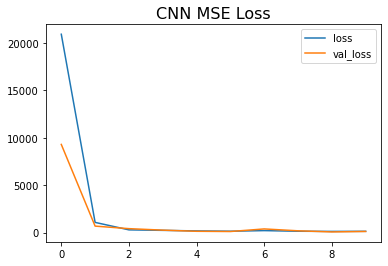

In [110]:
history_df.filter(like='loss').plot();
plt.title("CNN MSE Loss", fontsize=16)
plt.savefig('fig6.png')

(     Predictions  Actuals
 0      20.169910     19.5
 1      20.169910     19.5
 2      20.169910     19.5
 3      20.169910     19.5
 4      20.169910     19.5
 ..           ...      ...
 184   287.957764    304.5
 185   306.009949    306.5
 186   313.843414    333.0
 187   336.673462    345.5
 188   352.282867    345.5
 
 [189 rows x 2 columns],
 169.38069044413407)

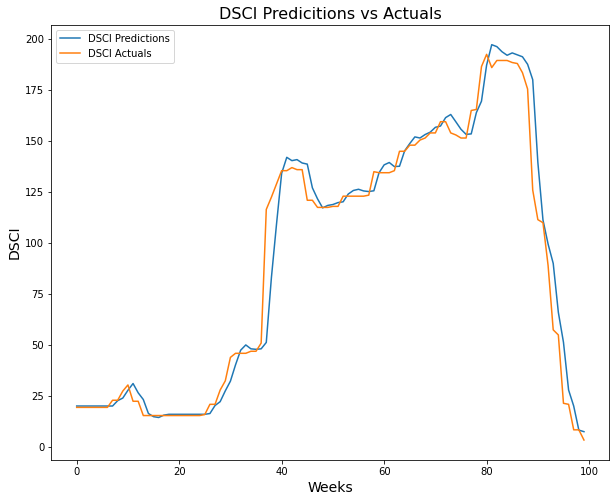

In [113]:
plot_predictions1('cnn', model2, X_test, y_test)

In [52]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [53]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [54]:
history = (model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3]))

Epoch 1/10
24/24 [==============================] - 5s 35ms/step - loss: 41299.8086 - root_mean_squared_error: 203.2235 - val_loss: 65123.3438 - val_root_mean_squared_error: 255.1928


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 2/10
24/24 [==============================] - 0s 7ms/step - loss: 35854.0391 - root_mean_squared_error: 189.3516 - val_loss: 54911.6367 - val_root_mean_squared_error: 234.3323


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 27754.2285 - root_mean_squared_error: 166.5960 - val_loss: 41288.4883 - val_root_mean_squared_error: 203.1957


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 18115.6270 - root_mean_squared_error: 134.5943 - val_loss: 26679.3320 - val_root_mean_squared_error: 163.3381


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 5/10
24/24 [==============================] - 0s 16ms/step - loss: 9940.7422 - root_mean_squared_error: 99.7033 - val_loss: 15187.6240 - val_root_mean_squared_error: 123.2381


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 6/10
24/24 [==============================] - 0s 8ms/step - loss: 5037.4448 - root_mean_squared_error: 70.9750 - val_loss: 8457.5273 - val_root_mean_squared_error: 91.9648


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 7/10
24/24 [==============================] - 0s 6ms/step - loss: 2715.6389 - root_mean_squared_error: 52.1118 - val_loss: 5149.4023 - val_root_mean_squared_error: 71.7593


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 8/10
24/24 [==============================] - 0s 9ms/step - loss: 1680.1128 - root_mean_squared_error: 40.9892 - val_loss: 3252.1091 - val_root_mean_squared_error: 57.0273


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 9/10
24/24 [==============================] - 0s 7ms/step - loss: 1124.5314 - root_mean_squared_error: 33.5340 - val_loss: 2017.2086 - val_root_mean_squared_error: 44.9133


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 10/10
24/24 [==============================] - 0s 7ms/step - loss: 757.1889 - root_mean_squared_error: 27.5171 - val_loss: 1287.0112 - val_root_mean_squared_error: 35.8749


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


(     Predictions  Actuals
 0      23.218063     19.5
 1      23.218063     19.5
 2      23.218063     19.5
 3      23.218063     19.5
 4      23.218063     19.5
 ..           ...      ...
 184   295.305084    304.5
 185   299.502472    306.5
 186   299.608063    333.0
 187   300.464447    345.5
 188   300.543915    345.5
 
 [189 rows x 2 columns],
 192.33709352112936)

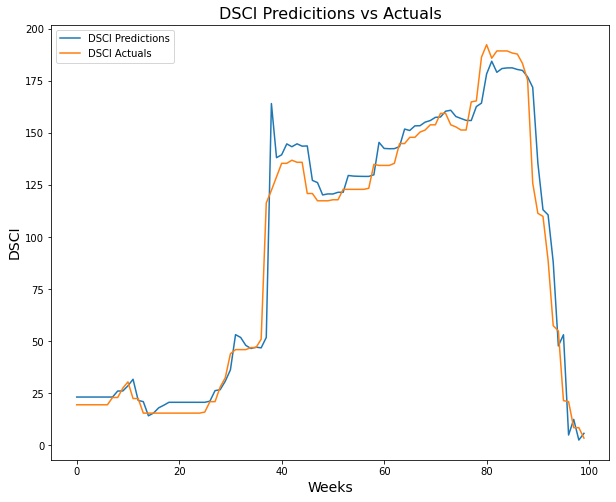

In [55]:
plot_predictions1(7, model3, X_test, y_test)

In [56]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,41299.808594,203.223541,65123.343750,255.192764
1,35854.039062,189.351624,54911.636719,234.332321
2,27754.228516,166.596008,41288.488281,203.195694
3,18115.626953,134.594299,26679.332031,163.338089
4,9940.742188,99.703270,15187.624023,123.238075
5,5037.444824,70.974960,8457.527344,91.964813
6,2715.638916,52.111794,5149.402344,71.759338
7,1680.112793,40.989178,3252.109131,57.027267
8,1124.531372,33.534035,2017.208618,44.913345
9,757.188904,27.517065,1287.011230,35.874939


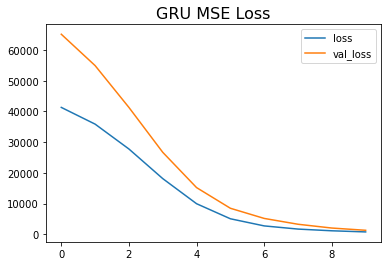

In [57]:
history_df.filter(like='loss').plot();
plt.title("GRU MSE Loss", fontsize=16)
plt.savefig('fig8.png')

In [58]:
dsci_df = pd.DataFrame({'DSCI':west['DSCI']})
dsci_df['Seconds']=dsci_df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day
dsci_df['year sin'] = np.sin(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df['year cos'] = np.cos(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df

,DSCI,Seconds,year sin,year cos
ValidEnd,,,,
2001-01-01,0.0,9.783072e+08,0.008300,0.999966
2001-01-08,15.5,9.789120e+08,0.128365,0.991727
2001-01-15,29.5,9.795168e+08,0.246570,0.969125
2001-01-22,15.0,9.801216e+08,0.361204,0.932487
2001-01-29,28.5,9.807264e+08,0.470607,0.882343
...,...,...,...,...
2020-11-30,304.5,1.606694e+09,-0.513800,0.857910
2020-12-07,306.5,1.607299e+09,-0.407020,0.913419
2020-12-14,333.0,1.607904e+09,-0.294344,0.955699


In [59]:
dsci_df.drop('Seconds', axis=1, inplace=True)

In [60]:
def df_to_X_y2(df, windowsize=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+5][0]
        y.append(label)
    return np.array(X), np.array(y)

In [61]:
X2, y2 = df_to_X_y2(dsci_df)
X2.shape, y2.shape

((1038, 6, 3), (1038,))

In [62]:
X2_train, y2_train = X2[:750], y2[:750]
X2_val, y2_val = X2[750:850], y2[750:850]
X2_test, y2_test = X2[850:], y2[850:]

In [63]:
dsci_training_mean = np.mean(X2_train[:, :, 0])
temp_training_sd = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - dsci_training_mean/temp_training_sd)
    return X


In [64]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.79446130e+01,  9.65598082e-01, -2.60039120e-01],
        [ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01]],

       [[ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130e+01,  5.52380262e-01, -8.33592254e-01]],

       [[ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130

In [65]:
model4 = Sequential()
model4.add(InputLayer((5,3)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [66]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [67]:
history = (model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4]))

Epoch 1/10


21/24 [=========================>....] - ETA: 0s - loss: 41854.6992 - root_mean_squared_error: 204.5842WARNING:tensorflow:Model was constructed with shape (None, 5, 3) for input KerasTensor(type_spec=TensorSpec(shape=(None, 5, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'"), but it was called on an input with incompatible shape (None, 6, 3).


24/24 [==============================] - 3s 40ms/step - loss: 41002.3750 - root_mean_squared_error: 202.4904 - val_loss: 61010.0117 - val_root_mean_squared_error: 247.0020


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 31322.9902 - root_mean_squared_error: 176.9830 - val_loss: 46844.3516 - val_root_mean_squared_error: 216.4356


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 22093.4551 - root_mean_squared_error: 148.6387 - val_loss: 32939.1836 - val_root_mean_squared_error: 181.4915


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 4/10
24/24 [==============================] - 0s 7ms/step - loss: 13570.2578 - root_mean_squared_error: 116.4914 - val_loss: 20617.1973 - val_root_mean_squared_error: 143.5869


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 5/10
24/24 [==============================] - 0s 7ms/step - loss: 7434.5361 - root_mean_squared_error: 86.2238 - val_loss: 12182.2998 - val_root_mean_squared_error: 110.3735


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 4045.6116 - root_mean_squared_error: 63.6051 - val_loss: 7264.4551 - val_root_mean_squared_error: 85.2318


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 2324.6133 - root_mean_squared_error: 48.2142 - val_loss: 4580.9487 - val_root_mean_squared_error: 67.6827


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 8/10
24/24 [==============================] - 0s 9ms/step - loss: 1465.1245 - root_mean_squared_error: 38.2769 - val_loss: 2920.5369 - val_root_mean_squared_error: 54.0420


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 9/10
24/24 [==============================] - 0s 7ms/step - loss: 946.2620 - root_mean_squared_error: 30.7614 - val_loss: 1789.3544 - val_root_mean_squared_error: 42.3008


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 10/10
24/24 [==============================] - 0s 8ms/step - loss: 615.9543 - root_mean_squared_error: 24.8184 - val_loss: 1142.6392 - val_root_mean_squared_error: 33.8029


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


(     Predictions  Actuals
 0      19.486830     19.5
 1      19.464943     19.5
 2      19.437305     19.5
 3      19.403692     19.5
 4      19.364075     19.5
 ..           ...      ...
 183   284.228851    282.0
 184   295.883026    304.5
 185   299.340912    306.5
 186   301.310089    333.0
 187   301.637421    345.5
 
 [188 rows x 2 columns],
 30.970152621879063)

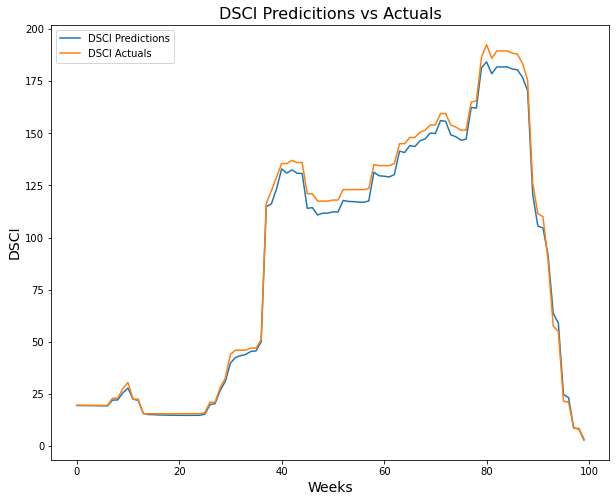

In [68]:
plot_predictions1(9, model4, X2_test, y2_test)

In [69]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,41002.375000,202.490433,61010.011719,247.002045
1,31322.990234,176.983017,46844.351562,216.435562
2,22093.455078,148.638672,32939.183594,181.491547
3,13570.257812,116.491447,20617.197266,143.586899
4,7434.536133,86.223755,12182.299805,110.373459
5,4045.611572,63.605122,7264.455078,85.231773
6,2324.613281,48.214245,4580.948730,67.682709
7,1465.124512,38.276943,2920.536865,54.041992
8,946.262024,30.761372,1789.354370,42.300762
9,615.954346,24.818428,1142.639160,33.802944


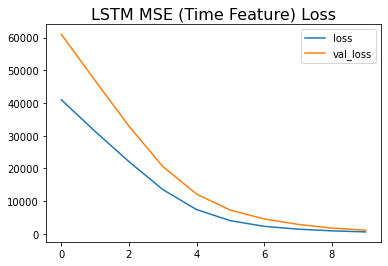

In [70]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE (Time Feature) Loss", fontsize=16)
plt.savefig('fig10.png')

In [71]:
tmax_dsci_df = pd.concat([west['avg_tmax'], dsci_df], axis=1)

In [72]:
prcp_dsci_df = pd.concat([west['total_avg_prcp_inches'], dsci_df], axis=1)

In [73]:
tmax_dsci_df.head()

,avg_tmax,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,55.340909,0.0,0.008300,0.999966
2001-01-08,56.907792,15.5,0.128365,0.991727
2001-01-15,45.813312,29.5,0.246570,0.969125
2001-01-22,47.125649,15.0,0.361204,0.932487
2001-01-29,46.303571,28.5,0.470607,0.882343


In [74]:
prcp_dsci_df.head()

,total_avg_prcp_inches,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,0.000000,0.0,0.008300,0.999966
2001-01-08,0.573636,15.5,0.128365,0.991727
2001-01-15,1.895909,29.5,0.246570,0.969125
2001-01-22,0.072500,15.0,0.361204,0.932487
2001-01-29,1.511818,28.5,0.470607,0.882343


In [75]:
def df_to_X_y3(df, windowsize=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+windowsize][0], df_as_np[i+windowsize][1]
        y.append(label)
    return np.array(X), np.array(y)

In [76]:
X3, y3 = df_to_X_y3(prcp_dsci_df)
X3.shape, y3.shape

((1037, 7, 4), (1037, 2))

In [77]:
X3_train, y3_train = X3[:750], y3[:750]
X3_val, y3_val = X3[750:850], y3[750:850]
X3_test, y3_test = X3[850:], y3[850:]

In [78]:
#Standardizing for Preprocessing. Followed video instructions, but could try a MinMax scaler next time
prcp_training_mean3 = np.mean(X3_train[:, :, 0])
prcp_training_std3 = np.mean(X3_train[:, :, 0])

dsci_training_mean3 = np.mean(X3_train[:, :, 1])
dsci_training_sd3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, :, 1] = (X[:, :,1] - dsci_training_mean3/dsci_training_sd3)
    return X
def preprocess_out(X):
    X[:, 0] = (X[:, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, 1] = (X[:,1] - dsci_training_mean3/dsci_training_sd3)
    return X



In [79]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-3.33333333e-02,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [80]:
preprocess_out(X3_train)
preprocess_out(X3_val)
preprocess_out(X3_test)

array([[[-1.03333333e+00,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [-1.78424143e+00,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-1.22750000e+00,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [-2.28424143e+00,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [81]:
model5 = Sequential()
model5.add(InputLayer((7,4)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [82]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [83]:
history = (model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5]))

Epoch 1/10
24/24 [==============================] - 3s 34ms/step - loss: 21404.8809 - root_mean_squared_error: 146.3041 - val_loss: 32543.6191 - val_root_mean_squared_error: 180.3985


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 2/10
24/24 [==============================] - 0s 7ms/step - loss: 19334.0684 - root_mean_squared_error: 139.0470 - val_loss: 28721.3730 - val_root_mean_squared_error: 169.4738


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 16271.3711 - root_mean_squared_error: 127.5593 - val_loss: 23807.4355 - val_root_mean_squared_error: 154.2966


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 12360.0449 - root_mean_squared_error: 111.1758 - val_loss: 17912.3105 - val_root_mean_squared_error: 133.8369


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 8369.9990 - root_mean_squared_error: 91.4877 - val_loss: 12202.3076 - val_root_mean_squared_error: 110.4641


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 5111.2622 - root_mean_squared_error: 71.4931 - val_loss: 7717.8569 - val_root_mean_squared_error: 87.8513


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 7/10
24/24 [==============================] - 0s 11ms/step - loss: 2925.5034 - root_mean_squared_error: 54.0879 - val_loss: 4756.3271 - val_root_mean_squared_error: 68.9661


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 8/10
24/24 [==============================] - 0s 11ms/step - loss: 1748.5962 - root_mean_squared_error: 41.8162 - val_loss: 3040.1179 - val_root_mean_squared_error: 55.1373


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 9/10
24/24 [==============================] - 0s 14ms/step - loss: 1136.5333 - root_mean_squared_error: 33.7125 - val_loss: 2005.4036 - val_root_mean_squared_error: 44.7817


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 10/10
24/24 [==============================] - 0s 11ms/step - loss: 775.8739 - root_mean_squared_error: 27.8545 - val_loss: 1392.3666 - val_root_mean_squared_error: 37.3144


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


In [84]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    prcp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end], label='Precipitation Pred')
    plt.plot(df['Precipitation Actuals'][start:end], label='Precipitation Actual')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]


,Precipitation Predictions,Precipitation Actuals,DSCI Pred,DSCI Actuals
0,1.068794,0.035000,22.132324,19.5
1,1.076991,0.749167,22.029446,19.5
2,1.103547,0.023333,19.092878,19.5
3,1.088433,0.010000,21.819117,19.5
4,1.092771,0.005000,22.046520,19.5
...,...,...,...,...
95,1.083592,0.760000,20.634214,8.5
96,1.043587,1.267500,7.266689,8.5
97,0.879029,0.435000,6.112929,3.5
98,0.789618,0.490000,4.986223,3.0


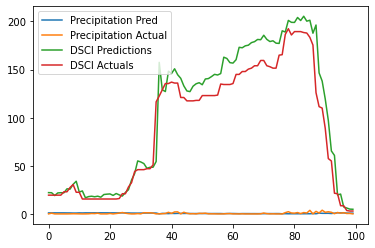

In [85]:
plot_predictions2(11, model5, X3_test, y3_test)

In [86]:
def postprocess_dsci(arr):
    arr = (arr*dsci_training_sd3) + dsci_training_mean3
    return arr

def postprocess_prcp(arr):
    arr = (arr*prcp_training_std3) + prcp_training_mean3
    return arr

In [87]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = postprocess_prcp(predictions[:, 0]), postprocess_dsci(predictions[:, 1])
    prcp_actuals, dsci_actuals = postprocess_prcp(y[:, 0]), postprocess_dsci(y[:, 1])
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end])
    plt.plot(df['Precipitation Actuals'][start:end])
    plt.plot(df['DSCI Pred'][start:end])
    plt.plot(df['DSCI Actuals'][start:end])
    plt.savefig(f'fig{str(fignum)}.png')
    return df[start:end]

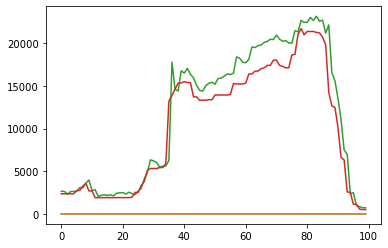

In [88]:
post_processed_df = plot_predictions2(12, model5, X3_test, y3_test)

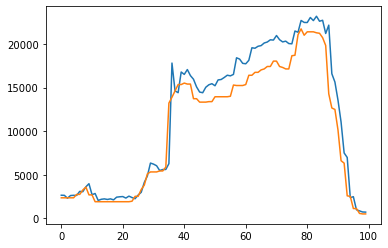

In [89]:
start, end = 0, 100
plt.plot(post_processed_df['DSCI Pred'][start: end])
plt.plot(post_processed_df['DSCI Actuals'][start: end])

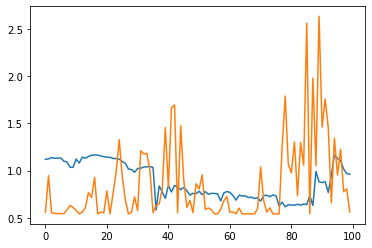

In [90]:
start, end = 0, 100
plt.plot(post_processed_df['Precipitation Predictions'][start: end])
plt.plot(post_processed_df['Precipitation Actuals'][start: end])

In [91]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,21404.880859,146.304077,32543.619141,180.398499
1,19334.068359,139.047012,28721.373047,169.473816
2,16271.371094,127.559288,23807.435547,154.296585
3,12360.044922,111.175751,17912.310547,133.836884
4,8369.999023,91.487701,12202.307617,110.464058
5,5111.262207,71.493095,7717.856934,87.851334
6,2925.503418,54.087921,4756.327148,68.966133
7,1748.596191,41.816219,3040.117920,55.137264
8,1136.533325,33.712509,2005.403564,44.781734
9,775.873901,27.854513,1392.366577,37.314430


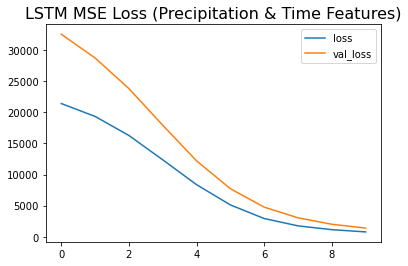

In [92]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (Precipitation & Time Features)", fontsize=16)
plt.savefig('fig13.png')

In [93]:
X4, y4 = df_to_X_y3(tmax_dsci_df)
X4.shape, y4.shape

((1037, 7, 4), (1037, 2))

In [94]:
X4_train, y4_train = X4[:750], y4[:750]
X4_val, y4_val = X4[750:850], y4[750:850]
X4_test, y4_test = X4[850:], y4[850:]

In [95]:
preprocess3(X4_train)
preprocess3(X4_val)
preprocess3(X4_test)

array([[[ 6.48452381e+01,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [ 6.68095238e+01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [ 7.00535714e+01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[ 6.68095238e+01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [ 7.46130952e+01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [ 8.205

In [96]:
preprocess_out(X4_train)
preprocess_out(X4_val)
preprocess_out(X4_test)

array([[[ 6.38452381e+01,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [ 6.52527824e+01,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [ 7.00535714e+01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[ 6.58095238e+01,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [ 6.55563538e+01,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [ 7.46130952e+01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [ 8.205

In [114]:
model6 = Sequential()
model6.add(InputLayer((7,4)))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))
model6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 18        
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [123]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [124]:
history = (model6.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=10, callbacks=[cp6]))

Epoch 1/10
24/24 [==============================] - 3s 32ms/step - loss: 21683.0000 - root_mean_squared_error: 147.2515 - val_loss: 32188.4551 - val_root_mean_squared_error: 179.4114


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 19840.3984 - root_mean_squared_error: 140.8559 - val_loss: 29693.2773 - val_root_mean_squared_error: 172.3174


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 3/10
24/24 [==============================] - 0s 8ms/step - loss: 17817.6992 - root_mean_squared_error: 133.4830 - val_loss: 26937.7070 - val_root_mean_squared_error: 164.1271


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 15714.7812 - root_mean_squared_error: 125.3586 - val_loss: 24068.6484 - val_root_mean_squared_error: 155.1407


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 13719.2197 - root_mean_squared_error: 117.1291 - val_loss: 21293.8281 - val_root_mean_squared_error: 145.9240


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 6/10
24/24 [==============================] - 0s 20ms/step - loss: 11861.9502 - root_mean_squared_error: 108.9126 - val_loss: 18486.1816 - val_root_mean_squared_error: 135.9639


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 7/10
24/24 [==============================] - 0s 11ms/step - loss: 9838.7754 - root_mean_squared_error: 99.1906 - val_loss: 15576.6113 - val_root_mean_squared_error: 124.8063


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 8/10
24/24 [==============================] - 0s 13ms/step - loss: 7910.4600 - root_mean_squared_error: 88.9408 - val_loss: 12787.5674 - val_root_mean_squared_error: 113.0821


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 9/10
24/24 [==============================] - 0s 9ms/step - loss: 6156.9741 - root_mean_squared_error: 78.4664 - val_loss: 10156.6260 - val_root_mean_squared_error: 100.7801


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 10/10
24/24 [==============================] - 0s 9ms/step - loss: 4628.3232 - root_mean_squared_error: 68.0318 - val_loss: 8033.2837 - val_root_mean_squared_error: 89.6286


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


In [125]:
def plot_predictions3(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    temp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    temp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'High Temperature Predictions': temp_preds, 
        'High Temperature Actuals': temp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.figure(figsize = (10,8))
    plt.plot(df['High Temperature Predictions'][start:end], label='High Temperature Predictions')
    plt.plot(df['High Temperature Actuals'][start:end], label='High Temperature Actuals')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]

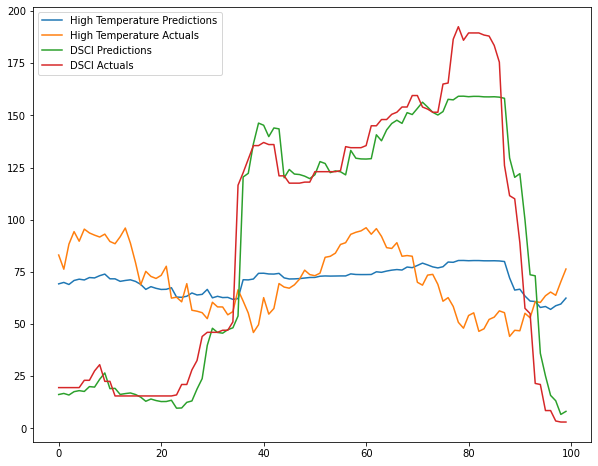

In [126]:
post_processed_df2 = plot_predictions3(16, model6, X4_test, y4_test)

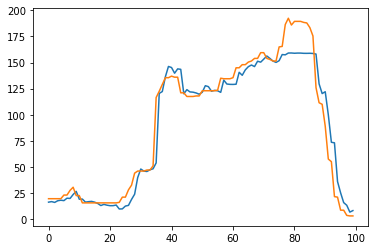

In [127]:
start, end = 0, 100
plt.plot(post_processed_df2['DSCI Pred'][start: end])
plt.plot(post_processed_df2['DSCI Actuals'][start: end])
plt.savefig('fig15.png')

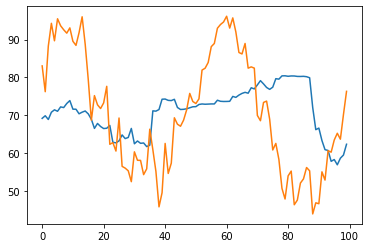

In [128]:
start, end = 0, 100
plt.plot(post_processed_df2['High Temperature Predictions'][start: end])
plt.plot(post_processed_df2['High Temperature Actuals'][start: end])

In [129]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,21683.000000,147.251480,32188.455078,179.411407
1,19840.398438,140.855942,29693.277344,172.317368
2,17817.699219,133.482956,26937.707031,164.127106
3,15714.781250,125.358612,24068.648438,155.140732
4,13719.219727,117.129074,21293.828125,145.924042
5,11861.950195,108.912582,18486.181641,135.963898
6,9838.775391,99.190605,15576.611328,124.806297
7,7910.459961,88.940773,12787.567383,113.082130
8,6156.974121,78.466393,10156.625977,100.780090
9,4628.323242,68.031784,8033.283691,89.628593


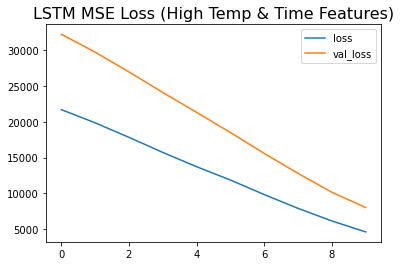

In [130]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (High Temp & Time Features)", fontsize=16)
plt.savefig('fig17.png')

#### Model Summary

Model|MSE|Val Loss|RMSE|
|---|---|---|---|
|LSTM|544.09|760.45|27.57|
|CNN|138.06|123.14|11.75|
|GRU|757.87|1187.01|44.91|
|LSTM M.V.|615.95|1142.63|33.8|
|LSTM Precip.|757.87|2000.4|44.7|
|LSTM Temp|4628.32|8033.28|89.62|